# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [43]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

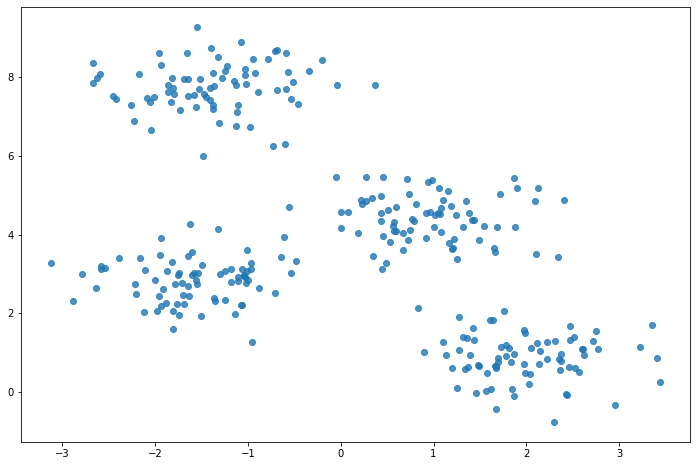

In [44]:
# 3 points

#make the dataset with make_blobs use random state 0 use 300 samples
#And plot it
X,Y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

# YOUR CODE HERE
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], alpha=0.8)
plt.show()

In [45]:
assert X.shape== (300,2)
assert Y.shape== (300,)

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```, it should give the same result as the previous 2 combined.
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [46]:
# 3 points

#implement square diff
# your code here

def square_diff(v1, v2):
    distance = []
    for i in range(v1.shape[0]):
        distance.append((v1[i]- v2[i])**2)
    return np.array(distance)

    
def get_eucledian_distance(v1,v2):
    ### Passes in 2 rows of data, can have ndimensions
    distance = []
    for i in range(v1.shape[0]) :
        distance.append((v1[i] - v2[i]) ** 2)
    return np.sqrt(np.sum(distance))
get_eucledian_distance(X[0],X[1])

5.733422120244678

In [47]:

assert square_diff(X[0],X[1]).shape==(2,) 


assert square_diff(X[0],X[0])[0]== 0
assert square_diff(X[0],X[0])[1]== 0 

assert abs(square_diff(X[0],X[1])[0] - 5.06) < 0.05
assert abs(square_diff(X[0],X[1])[1]-  27.80) < 0.05


assert abs(square_diff(X[0],X[100])[0] - 2.03) < 0.05
assert abs(square_diff(X[0],X[100])[1]-  41.96) < 0.05



assert abs(square_diff(X[200],X[256])[0]- 3.30 ) < 0.05
assert abs(square_diff(X[200],X[256])[1]- 0.09 ) < 0.05

In [48]:
# 2 points
#implement root sum squares
#your code here
def root_sum_squared(v1):
    return np.sqrt(np.sum(v1))
root_sum_squared(square_diff(X[0],X[1]))

5.733422120244678

In [49]:
v1 = root_sum_squared(square_diff(X[0],X[0]))
v2 = root_sum_squared(square_diff(X[0],X[1]))
v3 = root_sum_squared(square_diff(X[0],X[100]))
v4 = root_sum_squared(square_diff(X[200],X[256]))


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [50]:
def euclidean_distances(v1,v2):
    return np.linalg.norm(v1-v2)

print(euclidean_distances(X[0], X[1]))

5.733422120244678


In [51]:
v1 = euclidean_distances(X[0],X[0])
v2 = euclidean_distances(X[0],X[1])
v3 = euclidean_distances(X[0],X[100])
v4 = euclidean_distances(X[200],X[256])


assert v1 == 0
assert abs( v2 - 5.73) < 0.05
assert abs( v3 - 6.63) < 0.05
assert abs( v4 - 1.84) < 0.05

In [55]:
# 3 points
# implement the evaluate function RETURN THE A VALUE BETWEEN 0 AND 1
# your code here
# This cell will be evaluated later on
# Implement evaluate that takes in y_hat and y_true (classifications of the blobs)
# and returns the accruacy of the KNN predict function.
def evaluate(y, y_p): 
    correct = 0
    incorrect = 0
    for i, ii in zip(y, y_p):
        if i == ii:
            correct += 1
        else:
            incorrect += 1
    return correct / (correct + incorrect)
    
    
    
    
    
    
    
    


In [54]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([1,2,2])
d = np.array([2,2,2])

assert evaluate(a,b) == 1
assert 0.66 <= evaluate(a,c) <= 0.667
assert 0.33 <= evaluate(a,d) <= 0.34

### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [72]:
# 10 points
#Implement the KNN function that predicts the class for the test values using the train values
#your code here
#OUTPUT MUST BE A NP ARRAY

def select_neighbours(dist_list, k):
    sl = sorted(dist_list, key=lambda tup: tup[0])
    return sl[1:k+1]

def get_all_distances(X_train, from_point, y_train):
    distances = []
    for i in range(X_train.shape[0]):
        distance = get_eucledian_distance(X_train[i], from_point)
        distances.append((distance, y_train[i]))
    return distances

def find_label(final_n):
    labels_only = [l[1] for l in final_n]
    unique_labels = set(labels_only)
    count_dict = {l:0 for l in unique_labels}
    for label in labels_only:
        count_dict[label] = count_dict[label] + 1
    predicted_label = None
    predicted_max = 0
    for label, count in count_dict.items():
        if count > predicted_max:
            predicted_label = label
            predicted_max = count
    return predicted_label


def predict(x_test, x_true, y_true, k= 5):
    predictions = []
    # for each test case
    # find the distance from the train cases
    for i, row in enumerate(x_test):
        dist_point_to_predict = get_all_distances(x_train, row, y_train)
        find_neighbours = select_neighbours(dist_point_to_predict, k)
        label = find_label(find_neighbours)
        predictions.append(label)        
    return np.array(predictions)

In [73]:
#1 point
from sklearn.model_selection import train_test_split
#tested with random state 0
#create the train test split test_size 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)






In [74]:
assert x_train.shape == (240,2)
assert x_test.shape == (60,2)
assert y_train.shape == (240,)
assert y_test.shape == (60,)

In [75]:
predictions = predict(x_test,x_train, y_train, k=3)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [76]:
# Extra point
predictions = predict(x_test,x_train, y_train, k=2)
assert predictions.shape == (60,)
assert evaluate(predictions, y_test) >= 0.95


In [77]:
print('Accuracy {:0.2f}%'.format( evaluate(predictions, y_test)*100 ))

Accuracy 98.33%
